0.00354674063239
0.131107068006
1. Quadrant; does it have a solution? True
[  0  79 158 238 317 396 476 555 634 714 793 873 952]
[ 0.      0.0079  0.0158  0.0238  0.0317  0.0396  0.0476  0.0555  0.0634
  0.0714  0.0793  0.0873  0.0952]
359.172


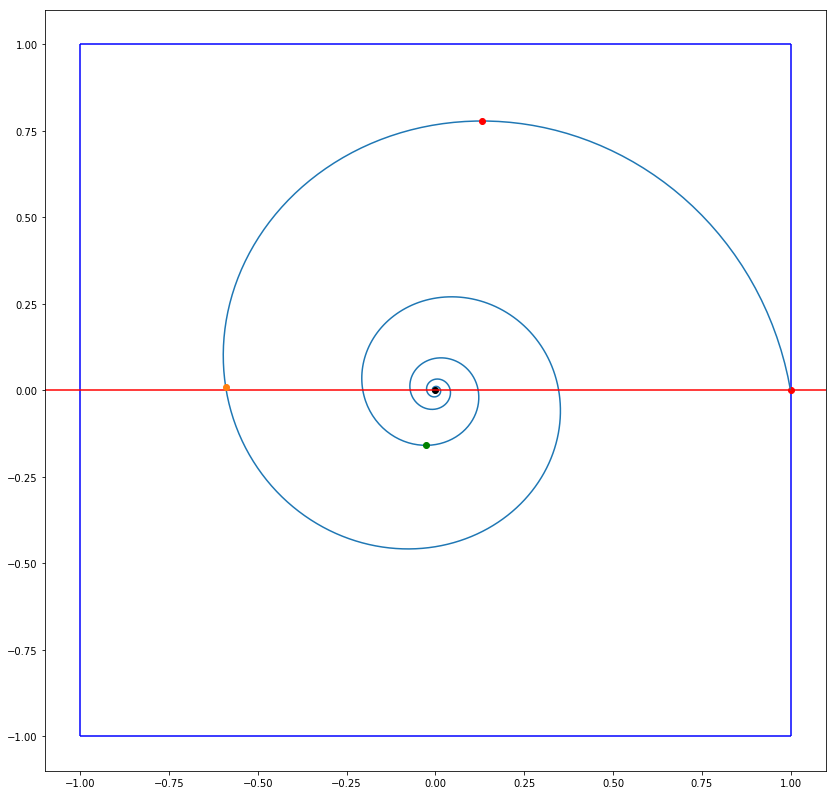

In [7]:
f = 63
dt = .0001
#f = 1 / 2 * np.pi
w = 2 * np.pi *f
tau = .015

r0 = 1.0
phi0_rad = 0 #between 0° and 360°

phi0 = (phi0_rad / 360) * 2 * np.pi

def r(t):
    return r0 * np.exp(-t/tau)

def phi(t):
    return phi0 + w*t

tend = 100
tend = 1/1000 * tend #transform to ms
ts = np.arange(0, tend, dt)

def x(t):
    return r(t) * np.cos(phi(t))

def y(t):
    return r(t) * np.sin(phi(t))

plt.figure(figsize=(14,14))
plt.hlines(y=r0, xmin=-r0, xmax=r0, color='b')
plt.hlines(y=-r0, xmin=-r0, xmax=r0, color='b')
plt.vlines(x=r0, ymin=-r0, ymax=r0, color='b')
plt.vlines(x=-r0, ymin=-r0, ymax=r0, color='b')


tcrit = (np.arctan(w*tau)-phi0+0*np.pi) / w
tcrit2 = (np.arctan(w*tau)-phi0+3*np.pi) / w

shift = ((540 - 2*phi0_rad) / 360) * 2 * np.pi

tcrit_shift = (np.arctan(w*tau)-phi0+2*np.pi+shift) / w
tcrit2_shift = (np.arctan(w*tau)-phi0+3*np.pi+shift) / w

ycrit = r0 * np.exp(-tcrit / tau) * np.sin(phi0 + tcrit * w)
ycrit2 = r0 * np.exp(-tcrit2 / tau) * np.sin(phi0 + tcrit2 * w)

xcrit = r0 * np.exp(-tcrit / tau) * np.cos(phi0 + tcrit * w)
xcrit2 = r0 * np.exp(-tcrit2 / tau) * np.cos(phi0 + tcrit2 * w)

xcrit_shift = r0 * np.exp(-tcrit_shift / tau) * np.cos(phi0 + tcrit_shift * w)
ycrit_shift = r0 * np.exp(-tcrit_shift / tau) * np.sin(phi0 + tcrit_shift * w)

print(tcrit)
print(xcrit)

def guess():
    return ycrit >= y(ts)[0]
def guess2():
    return ycrit2 <= y(ts)[0]
def guess13q():
    return ((y(ts)[1]-y(ts)[0])/ dt) > 0


plt.plot(x(0), y(0), 'o', color = 'red')
plt.plot(x(ts), y(ts))
#plt.savefig('beautiful')
plt.plot(xcrit, ycrit, 'o', color = 'red')
plt.plot(xcrit2, ycrit2, 'o', color = 'green')

#plt.plot(xcrit_shift, ycrit_shift, 'o', color = 'orange')
plt.plot(0,0, 'o', color = 'black')

plt.axhline(y=y(ts)[0], xmin=0.0, xmax=1.0, color='r')

#print(tcrit)
#print('Does it have a solution? {}'.format(guess2()))
#print('the slope in y0 is positive? {}'.format(guess13q()))

phi0m = phi0_rad % 360

if (phi0m < 90): #phi0 in the first quadrant
    print('1. Quadrant; does it have a solution? {}'.format(guess13q()))
elif ((phi0m > 90) & (phi0m < 180)): #phi0 in the second quadrant
    print('2. Quadrant; does it have a solution? {}'.format(guess()))
elif ((phi0m > 180) & (phi0m < 270)): #phi0 in the third quadrant
    print('3. Quadrant; does it have a solution? {}'.format(not guess13q()))
elif ((phi0m > 270) & (phi0m < 360)):
    print('4. Quadrant; does it have a solution? {}'.format(guess2()))
else:
    print('X')
    


y0s = np.zeros(len(ts)) + y(ts)[0]

idx = np.argwhere(np.diff(np.sign((y0s - y(ts)))) != 0).reshape(-1) + 0

if len(idx)>1:
    angle = np.arctan(y(ts)[idx[1]] / x(ts)[idx[1]]) / np.pi * 180
    if angle < 0:
        angle = 360 + angle

    plt.plot(x(ts)[idx[1]], y(ts)[idx[1]], 'o')
    print(idx)
    print(idx * dt)
    print(angle)

0.00442857484755
0.123621608368
4. Quadrant; does it have a solution? True
[  0 107 140]
[ 0.      0.0107  0.014 ]
42.676


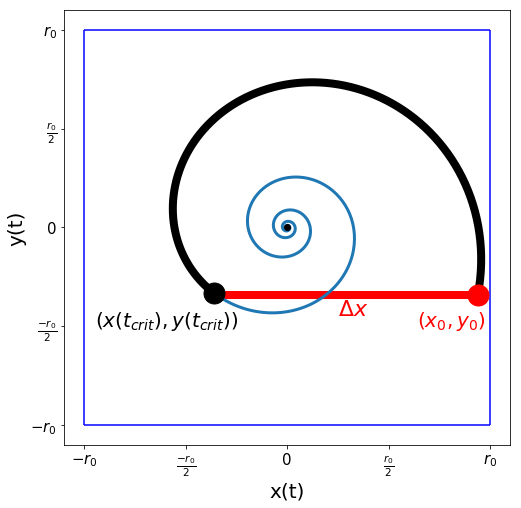

In [8]:
f = 63
dt = .0001
#f = 1 / 2 * np.pi
w = 2 * np.pi *f
tau = .015

r0 = 1.0
phi0_rad = 340 #between 0° and 360°

phi0 = (phi0_rad / 360) * 2 * np.pi

def r(t):
    return r0 * np.exp(-t/tau)

def phi(t):
    return phi0 + w*t

tend = 100
tend = 1/1000 * tend #transform to ms
ts = np.arange(0, tend, dt)

def x(t):
    return r(t) * np.cos(phi(t))

def y(t):
    return r(t) * np.sin(phi(t))

plt.figure(figsize=(8,8))
plt.hlines(y=r0, xmin=-r0, xmax=r0, color='b')
plt.hlines(y=-r0, xmin=-r0, xmax=r0, color='b')
plt.vlines(x=r0, ymin=-r0, ymax=r0, color='b')
plt.vlines(x=-r0, ymin=-r0, ymax=r0, color='b')


tcrit = (np.arctan(w*tau)-phi0+2*np.pi) / w
tcrit2 = (np.arctan(w*tau)-phi0+3*np.pi) / w

shift = ((540 - 2*phi0_rad) / 360) * 2 * np.pi

tcrit_shift = (np.arctan(w*tau)-phi0+2*np.pi+shift) / w
tcrit2_shift = (np.arctan(w*tau)-phi0+3*np.pi+shift) / w

ycrit = r0 * np.exp(-tcrit / tau) * np.sin(phi0 + tcrit * w)
ycrit2 = r0 * np.exp(-tcrit2 / tau) * np.sin(phi0 + tcrit2 * w)

xcrit = r0 * np.exp(-tcrit / tau) * np.cos(phi0 + tcrit * w)
xcrit2 = r0 * np.exp(-tcrit2 / tau) * np.cos(phi0 + tcrit2 * w)

xcrit_shift = r0 * np.exp(-tcrit_shift / tau) * np.cos(phi0 + tcrit_shift * w)
ycrit_shift = r0 * np.exp(-tcrit_shift / tau) * np.sin(phi0 + tcrit_shift * w)

print(tcrit)
print(xcrit)

def guess():
    return ycrit >= y(ts)[0]
def guess2():
    return ycrit2 <= y(ts)[0]
def guess13q():
    return ((y(ts)[1]-y(ts)[0])/ dt) > 0



plt.plot(x(ts), y(ts), linewidth = 3)
#plt.savefig('beautiful')
#plt.plot(xcrit, ycrit, 'o', color = 'red')
#plt.plot(xcrit2, ycrit2, 'o', color = 'green')

#plt.plot(xcrit_shift, ycrit_shift, 'o', color = 'orange')
plt.plot(0,0, 'o', color = 'black')

plt.hlines(y=y(ts)[0], xmin=x(ts)[idx[1]], xmax=x(0), color='r', linewidth = 8)

#print(tcrit)
#print('Does it have a solution? {}'.format(guess2()))
#print('the slope in y0 is positive? {}'.format(guess13q()))

phi0m = phi0_rad % 360

if (phi0m < 90): #phi0 in the first quadrant
    print('1. Quadrant; does it have a solution? {}'.format(guess13q()))
elif ((phi0m > 90) & (phi0m < 180)): #phi0 in the second quadrant
    print('2. Quadrant; does it have a solution? {}'.format(guess()))
elif ((phi0m > 180) & (phi0m < 270)): #phi0 in the third quadrant
    print('3. Quadrant; does it have a solution? {}'.format(not guess13q()))
elif ((phi0m > 270) & (phi0m < 360)):
    print('4. Quadrant; does it have a solution? {}'.format(guess2()))
else:
    print('X')
    


y0s = np.zeros(len(ts)) + y(ts)[0]

idx = np.argwhere(np.diff(np.sign((y0s - y(ts)))) != 0).reshape(-1) + 0

if len(idx)>1:
    angle = np.arctan(y(ts)[idx[1]] / x(ts)[idx[1]]) / np.pi * 180
    if angle < 0:
        angle = 360 + angle

    plt.plot(x(ts)[idx[1]], y(ts)[idx[1]], 'o', markersize = 21, color = 'black')
    plt.plot(x(ts)[:idx[1]+1], y(ts)[:idx[1]+1], linewidth = 8, color = 'black')
    plt.plot(x(0), y(0), 'o', color = 'red', markersize = 21)
    plt.text(x(0)-.3, y(0)-.16, r'$(x_0, y_0)$', fontsize = 20, color = 'red')
    plt.text(x(ts)[idx[1]+1]-.6, y(0)-.16, r'$(x(t_{crit}), y(t_{crit}))$', fontsize = 20)
    plt.text(.25, y(0)-.1, r'$\Delta x$', fontsize = 22, color = 'red')
    plt.xlabel('x(t)', fontsize = 20)
    plt.ylabel('y(t)', fontsize = 20)
    plt.xticks([-1, -.5, 0, .5, 1], [r'$-r_0$', r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 15)
    plt.yticks([-1, -.5, 0, .5, 1], [r'$-r_0$', r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 15)
    #plt.set_xticklabels({})
#    plt.yticklabels(r'$-r_0$', r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$')
    print(idx)
    print(idx * dt)
    print(angle)

plt.savefig('BA_procedure2.pdf')

In [ ]:
f = 63
dt = .0001
#f = 1 / 2 * np.pi
w = 2 * np.pi *f
tau = .015

r0 = 1.0
phi0_rad = 340 #between 0° and 360°

phi0 = (phi0_rad / 360) * 2 * np.pi

def r(t):
    return r0 * np.exp(-t/tau)

def phi(t):
    return phi0 + w*t

tend = 100
tend = 1/1000 * tend #transform to ms
ts = np.arange(0, tend, dt)

def x(t):
    return r(t) * np.cos(phi(t))

def y(t):
    return r(t) * np.sin(phi(t))

plt.figure(figsize=(8,8))
plt.hlines(y=r0, xmin=-r0, xmax=r0, color='b')
plt.hlines(y=-r0, xmin=-r0, xmax=r0, color='b')
plt.vlines(x=r0, ymin=-r0, ymax=r0, color='b')
plt.vlines(x=-r0, ymin=-r0, ymax=r0, color='b')

plt.hlines(y=0, xmin=-r0, xmax=r0, color='b')
plt.vlines(x=0, ymin=-r0, ymax=r0, color='b')


tcrit = (np.arctan(w*tau)-phi0+2*np.pi) / w
tcrit2 = (np.arctan(w*tau)-phi0+3*np.pi) / w

shift = ((540 - 2*phi0_rad) / 360) * 2 * np.pi

tcrit_shift = (np.arctan(w*tau)-phi0+2*np.pi+shift) / w
tcrit2_shift = (np.arctan(w*tau)-phi0+3*np.pi+shift) / w

ycrit = r0 * np.exp(-tcrit / tau) * np.sin(phi0 + tcrit * w)
ycrit2 = r0 * np.exp(-tcrit2 / tau) * np.sin(phi0 + tcrit2 * w)

xcrit = r0 * np.exp(-tcrit / tau) * np.cos(phi0 + tcrit * w)
xcrit2 = r0 * np.exp(-tcrit2 / tau) * np.cos(phi0 + tcrit2 * w)

xcrit_shift = r0 * np.exp(-tcrit_shift / tau) * np.cos(phi0 + tcrit_shift * w)
ycrit_shift = r0 * np.exp(-tcrit_shift / tau) * np.sin(phi0 + tcrit_shift * w)

print(tcrit)
print(xcrit)

def guess():
    return ycrit >= y(ts)[0]
def guess2():
    return ycrit2 <= y(ts)[0]
def guess13q():
    return ((y(ts)[1]-y(ts)[0])/ dt) > 0



plt.plot(x(ts), y(ts), linewidth = 3)
#plt.savefig('beautiful')
#plt.plot(xcrit, ycrit, 'o', color = 'red')
#plt.plot(xcrit2, ycrit2, 'o', color = 'green')

#plt.plot(xcrit_shift, ycrit_shift, 'o', color = 'orange')
plt.plot(0,0, 'o', color = 'black')

#plt.hlines(y=y(ts)[0], xmin=x(ts)[idx[1]], xmax=x(0), color='r', linewidth = 8)

#print(tcrit)
#print('Does it have a solution? {}'.format(guess2()))
#print('the slope in y0 is positive? {}'.format(guess13q()))

phi0m = phi0_rad % 360

if (phi0m < 90): #phi0 in the first quadrant
    print('1. Quadrant; does it have a solution? {}'.format(guess13q()))
elif ((phi0m > 90) & (phi0m < 180)): #phi0 in the second quadrant
    print('2. Quadrant; does it have a solution? {}'.format(guess()))
elif ((phi0m > 180) & (phi0m < 270)): #phi0 in the third quadrant
    print('3. Quadrant; does it have a solution? {}'.format(not guess13q()))
elif ((phi0m > 270) & (phi0m < 360)):
    print('4. Quadrant; does it have a solution? {}'.format(guess2()))
else:
    print('X')
    

xspi = np.arange(0, 2 * np.pi, .01)
plt.plot(np.sin(xspi), np.cos(xspi))
y0s = np.zeros(len(ts)) + y(ts)[0]

idx = np.argwhere(np.diff(np.sign((y0s - y(ts)))) != 0).reshape(-1) + 0

if len(idx)>1:
    angle = np.arctan(y(ts)[idx[1]] / x(ts)[idx[1]]) / np.pi * 180
    if angle < 0:
        angle = 360 + angle
        
    plt.xlabel('x(t)', fontsize = 20)
    plt.ylabel('y(t)', fontsize = 20)
    plt.xticks([-1, -.5, 0, .5, 1], [r'$-r_0$', r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 15)
    plt.yticks([-1, -.5, 0, .5, 1], [r'$-r_0$', r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 15)
    #plt.set_xticklabels({})
#    plt.yticklabels(r'$-r_0$', r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$')
    print(idx)
    print(idx * dt)
    print(angle)

plt.savefig('BA_solution_-1.pdf')

In [ ]:

np.arange(0, 10, 1).reshape(-1)

In [ ]:
.reshape

In [ ]:

import numpy as np                       # mathematical methods
from scipy.optimize import leastsq
from scipy import stats                  # contains some fitting routines
from scipy import signal
from scipy.misc import derivative
from scipy.signal import chirp
from scipy.signal import argrelextrema
import pandas as pd

from peakdetection import detect_peaks

#import matplotlib.pylab as plt
from matplotlib import pyplot as plt     # plotting methods within notebook

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


%matplotlib inline

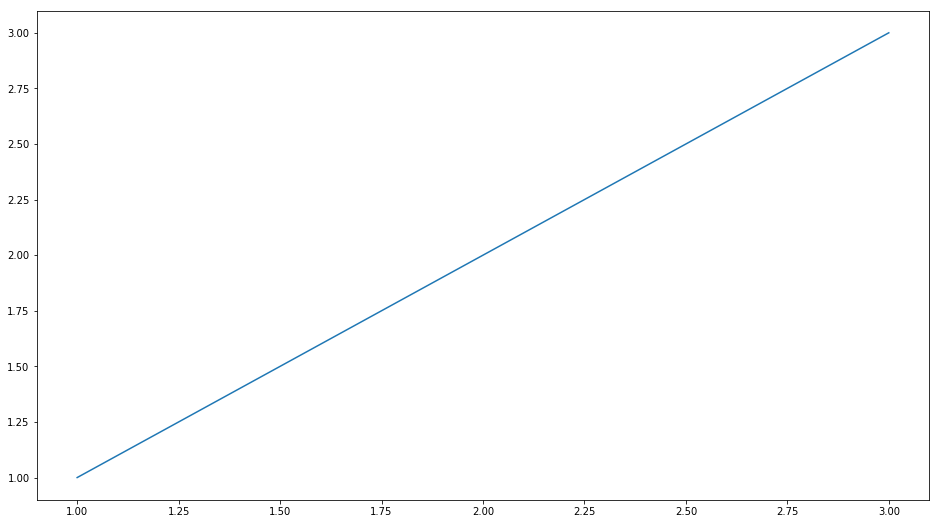

In [9]:
plt.figure(figsize = (16,9))
plt.plot([1,2,3], [1,2,3])

(-0.01, 0.08, -0.175, 1)

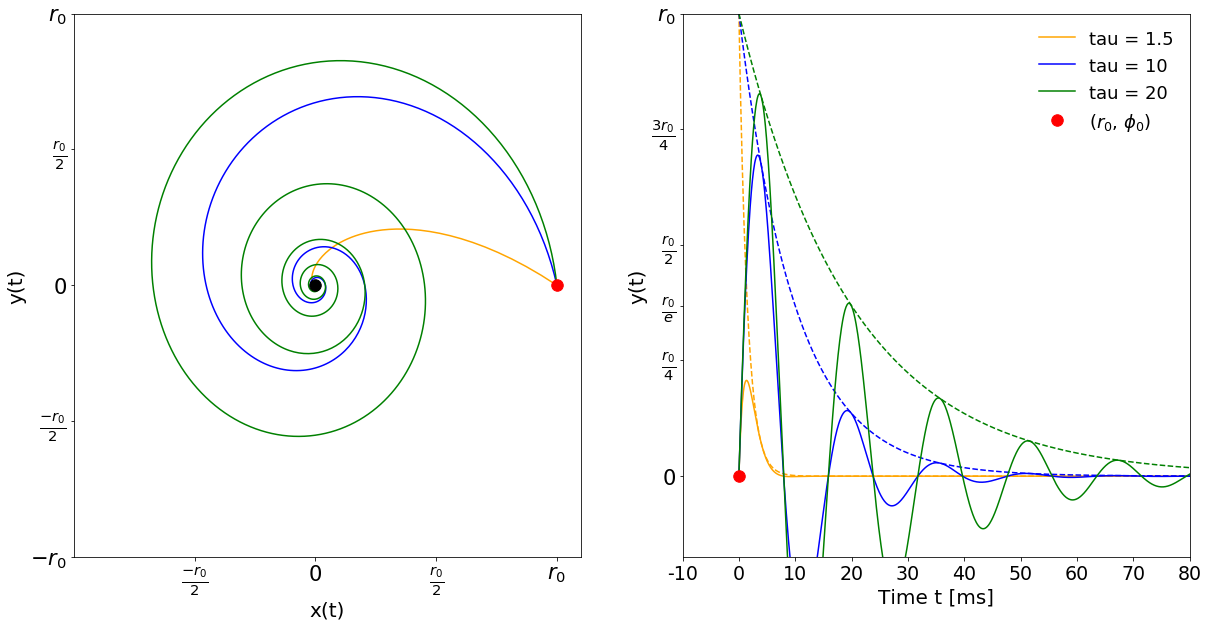

In [41]:
f = 63
dt = .0001
#f = 1 / 2 * np.pi
w = 2 * np.pi *f

tend = .1
tend = .1 * 1000

tau1 = .03
tau1 = tau1 / 1000
tau2 = .1
tau2 = tau2 / 1000

r0 = 1.0
phi0_rad = 0 #between 0° and 360°

phi0 = (phi0_rad / 360) * 2 * np.pi

def r(t, tau):
    return r0 * np.exp(-t/tau)
    
def phi(t):
    return phi0 + w*t

def phit(t, p0):
    return (p0 / 360) * 2 * np.pi + w*t

#tend = .0001
#tend = 1000 * tend #transform to ms
ts = np.arange(0, tend, dt)

def x(t, tau):
    return r(t,tau) * np.cos(phi(t))


def y(t, tau):
    return r(t, tau) * np.sin(phi(t))

def yt(t, tau, p0):
    return r(t, tau) * np.sin(phit(t, p0))


fig = plt.figure(figsize=(20,10))
#plt.hlines(y=r0, xmin=-r0, xmax=r0, color='b')
#plt.hlines(y=-r0, xmin=-r0, xmax=r0, color='b')
#plt.vlines(x=r0, ymin=-r0, ymax=r0, color='b')
#plt.vlines(x=-r0, ymin=-r0, ymax=r0, color='b')
#plt.xlabel('LÖL')

fig.add_subplot(1, 2, 1)


plt.plot(x(ts, .0015), y(ts, .0015), color = 'orange', label = 'tau = .0015')
plt.plot(x(ts, .01), y(ts, .01), color = 'blue', label = 'tau = .01')
plt.plot(x(ts, .02), y(ts, .02), color = 'green', label = 'tau = .03')
plt.plot(0,0, 'o', color = 'black', label = 'stable fixpoint', markersize = 11.5)
plt.plot(x(0, .01), y(0, .01), 'o', color = 'red', label = 'starting point', markersize = 11.5)
plt.xlabel('x(t)', fontsize = 20)
plt.ylabel('y(t)', fontsize = 20)
plt.xticks([-.5, 0, .5, 1], [r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 21)
plt.yticks([-1, -.5, 0, .5, 1], [r'$-r_0$', r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 21)
plt.axis((-1, 1.1, -1, 1))
fig.add_subplot(1, 2, 2)
plt.plot(ts, y(ts, .0015), color = 'orange', label = 'tau = 1.5')
plt.plot(ts, r(ts, .0015), linestyle = 'dashed', color = 'orange')
plt.plot(ts, y(ts, .01), color = 'blue', label = 'tau = 10')
plt.plot(ts, r(ts, .01), linestyle = 'dashed', color = 'blue')
plt.plot(ts, y(ts, .02), color = 'green', label = 'tau = 20')
plt.plot(ts, r(ts, .02), linestyle = 'dashed', color = 'green')
plt.xlabel('Time t [ms]', fontsize = 20)
plt.ylabel('y(t)', fontsize = 20)
plt.plot(ts[0], y(ts, .01)[0], 'o', color = 'red', markersize = 11.5, label = r'($r_0$, $\phi_0$)')
plt.legend(loc = 'upper right', fontsize = 18, frameon = False)
plt.yticks([-1, -.25, -.5, -.75, 0, .25, 1/np.exp(1), .5, .75, 1], [r'$-r_0$', ' ',  r'$\frac{-r_0}{2}$', r'$\frac{-r_0}{4}$', '0', r'$\frac{r_0}{4}$', r'$\frac{r_0}{e}$', r'$\frac{r_0}{2}$', r'$\frac{3 r_0}{4}$', r'$r_0$'], fontsize = 21)
plt.xticks([-0.01, 0, .01, .02, .03, .04, .05, .06, .07, .08], ['-10', '0',  '10', '20', '30', '40', '50', '60', '70', '80'], fontsize = 19)

plt.axis((-.01, .08, -.175, 1))





#print(tcrit)
#print('Does it have a solution? {}'.format(guess2()))
#print('the slope in y0 is positive? {}'.format(guess13q()))

#plt.savefig('BA_spiralbehavior2.pdf')


33.4312997885


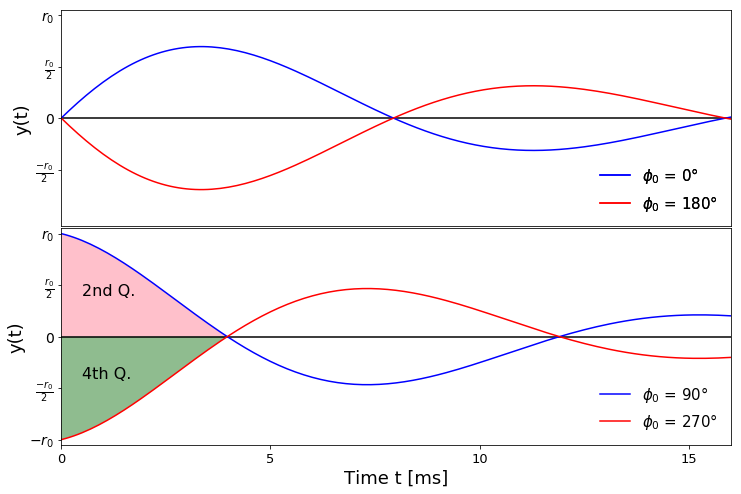

In [114]:

phi02 = 90

tau1 = .01
tau2 = .01

tcrit_max = (np.arctan(w*tau1)-phi0) / w
tcrit_max2 = (np.arctan(w*tau2)-phi02) / w


ycrit_max = r0 * np.exp(-tcrit_max / tau1) * np.sin(phi0 + tcrit_max * w)
tcrit0 = (np.arctan(w*tau1)-phi0+1*np.pi) / w
tcrit0l = (np.arctan(w*tau2)-phi02+1*np.pi) / w
tcrit = (np.arctan(w*tau1)-phi0+2*np.pi) / w
tcrit2 = (np.arctan(w*tau1)-phi0+3*np.pi) / w
#print(int(tcrit0 / dt))
#print(int(tcrit0l / dt))
#print(zeros[1])
ycrit0 = r0 * np.exp(-tcrit0 / tau1) * np.sin(phi0 + tcrit0 * w)
ycrit = r0 * np.exp(-tcrit / tau1) * np.sin(phi0 + tcrit * w)
ycrit2 = r0 * np.exp(-tcrit2 / tau1) * np.sin(phi0 + tcrit2 * w)

xcrit = r0 * np.exp(-tcrit / tau1) * np.cos(phi0 + tcrit * w)
xcrit2 = r0 * np.exp(-tcrit2 / tau1) * np.cos(phi0 + tcrit2 * w)


tcritl = (np.arctan(w*tau2)-phi02+2*np.pi) / w
tcrit2l = (np.arctan(w*tau2)-phi02+3*np.pi) / w

ycritl = r0 * np.exp(-tcrit / tau2) * np.sin(phi02 + tcrit * w)
ycrit2l = r0 * np.exp(-tcrit2 / tau2) * np.sin(phi02 + tcrit2 * w)

xcritl = r0 * np.exp(-tcrit / tau2) * np.cos(phi02 + tcrit * w)
xcrit2l = r0 * np.exp(-tcrit2 / tau2) * np.cos(phi02 + tcrit2 * w)

#print(tcrit0)

fig = plt.figure(figsize = (12,8))
fig.add_subplot(2,1,1)
plt.axhline(y=0, xmin=0.0, xmax=1.0, color='black')
line1, = plt.plot(ts, yt(ts, tau1, 0), color = 'blue', label = r'$\phi_0$ = 0°')
line11, = plt.plot(ts, yt(ts, tau1, 180), color = 'red', label = r'$\phi_0$ = 180°')
#plt.plot(ts, r(ts, .01), color = 'blue', linestyle = 'dashed')
plt.axis((0, .016, -1.05, 1.05))
#max1 = int(np.where(yt(ts, tau1, 0) == np.max(yt(ts, tau1, 0))/dt))
#min2 = int(np.where(ts == np.min(yt(ts, tau1, 0))/dt))

#print(max1)
print(tcrit_max/dt)
#plt.plot(ts[0], y(ts, tau1)[0], 'o', color = 'red', markersize = 11.5, label = r'($r_0$, $\phi_0$)')
#plt.axhline(y=y(ts, .01)[0], xmin=0.0, xmax=1.0, color='red')
plt.ylabel('y(t)', fontsize = 18)
plt.yticks([-.5, 0, .5, 1], [r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 14)
#plt.xlabel('time t', fontsize = 18)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)

idx = np.argwhere(np.diff(np.sign((ycrit - y(ts, tau1)))) != 0).reshape(-1) + 0
idx2 = np.argwhere(np.diff(np.sign((ycrit2 - y(ts, tau1)))) != 0).reshape(-1) + 0
zeros = np.argwhere(np.diff(np.sign((0 - y(ts, tau1)))) != 0).reshape(-1) + 0

#print(ts[idx])
#print(ts[idx2])

#print(ts[zeros])
#print(np.where(ts > tcrit0l))
#print(ts[73])

#plt.plot(tcrit, ycrit, 'o', color = 'red', markersize = 12)
#plt.axhline(y=ycrit, xmin=0.0, xmax=1.0, color='red', linestyle = 'dashed')
#print(zeros[0])
#plt.plot(tcrit2, ycrit2, 'o', color = 'green', markersize = 12)

#plt.hlines(y=ycrit2, xmin=ts[idx2][1], xmax=tcrit2, color='green', linestyle = 'dashed')

#plt.hlines(y=ycrit, xmin=ts[idx], xmax=tcrit, color='red', linestyle = 'dashed')
#plt.plot(ts[15], yt(ts[15], tau1, 0), 'o', color = 'black', markersize = 12)
#a1 = plt.fill_between(ts[0:33], y(ts[0:33], tau1), facecolor = 'cornflowerblue', interpolate = True, label = r'$\phi_0$ in 2nd Q.')
#a2 = plt.fill_between(ts[79:112], y(ts[79:112], tau1), facecolor = 'darkseagreen', interpolate = True, label = r'$\phi_0$ in 4th Q.')
#a1 = plt.fill_between(ts[0:33], yt(ts[0:33], tau1, 180), facecolor = 'gold', interpolate = True, label = r'$\phi_0$ in 2nd Q.')

#plt.text(.00175, .32, '1st Q.', fontsize = 16)
#plt.text(.00175, .32, r'$(r_0, \phi_0)$', fontsize = 16)
#plt.text(.00175, -.32, '3rd Q.', fontsize = 16)
#plt.plot([ts[10], ts[20]], [yt(ts[10], tau1, 0), yt(ts[20], tau1, 0)], color = 'black', linewidth = 5)
linelegend = plt.legend(handles=[line1, line11], loc='lower right', frameon = False, fontsize = 15)
ax = plt.gca().add_artist(linelegend)

#plt.legend(handles = [a1, a3, a2, a4], loc = 'upper right', frameon = False, fontsize = 12)
#plt.plot(t(ts)[idx[1]], y(ts)[idx[1]], 'o')
#plt.hlines(y=yt(ts[15], tau1, 0), xmin=ts[15], xmax=ts[54], color='black', linestyle = 'dashed')





plt.subplots_adjust(hspace = .01)
fig.add_subplot(2,1,2)
plt.axhline(y=0, xmin=0.0, xmax=1.0, color='black')
line2, = plt.plot(ts, yt(ts, tau2, 90), color = 'blue', label = r'$\phi_0$ = 90°')
line21, = plt.plot(ts, yt(ts, tau2, 270), color = 'red', label = r'$\phi_0$ = 270°')
#plt.plot(ts, r(ts, .01), color = 'blue', linestyle = 'dashed')
#print(np.max(y(ts, tau2)))
#print(np.min(y(ts, tau2)))
plt.axis((0, .016, -1.05, 1.05))

#plt.axhline(y=y(ts, .01)[0], xmin=0.0, xmax=1.0, color='red')
plt.ylabel('y(t)', fontsize = 18)
plt.xlabel('Time t [ms]', fontsize = 18)
plt.xticks([0.0, 0.005, .01, .015, .02, .025, .03, .035], ['0', '5', '10', '15', '20', '25', '30', '35'], fontsize = 13)
plt.yticks([-1, -.5, 0, .5, 1], [r'$-r_0$', r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 14)
idxl = np.argwhere(np.diff(np.sign((ycritl - y(ts, tau2)))) != 0).reshape(-1) + 0
idx2l = np.argwhere(np.diff(np.sign((ycrit2l - y(ts, tau2)))) != 0).reshape(-1) + 0
zerosl = np.argwhere(np.diff(np.sign((0 - y(ts, tau2)))) != 0).reshape(-1) + 0
plt.axis((0, .016, -1.05, 1.05))
#print(ts[zerosl])

#print(ts[idx])

#print(ts[idx2])

#plt.plot(tcritl, ycritl, 'o', color = 'red', markersize = 12)
#plt.axhline(y=ycrit, xmin=0.0, xmax=1.0, color='red', linestyle = 'dashed')

#plt.plot(tcrit2l, ycrit2l, 'o', color = 'green', markersize = 12)


#plt.hlines(y=ycrit2l, xmin=ts[idx2l][1], xmax=tcrit2l, color='green', linestyle = 'dashed')
#plt.hlines(y=ycritl, xmin=ts[idxl], xmax=tcritl, color='red', linestyle = 'dashed')
plt.text(.0005, .4, '2nd Q.', fontsize = 16)
plt.text(.0005, -.4, '4th Q.', fontsize = 16)
#print(idxl)
#print(zerosl)
#print(ts[idxl[0]:zerosl[0]])
plt.fill_between(ts[0:38+1+2], yt(ts[0:38+1+2], tau2, 90), facecolor = 'pink', interpolate = True)
plt.fill_between(ts[0:38+1+2], yt(ts[0:38+1+2], tau2, 270), facecolor = 'darkseagreen', interpolate = True)
#plt.fill_between(ts[79:117], y(ts[79:117], tau2), facecolor = 'darkseagreen', interpolate = True)

plt.legend(handles=[line2, line21], loc='lower right', frameon = False, fontsize = 15)


plt.savefig('BA_Solution3.pdf')

0.0073113839471
0.0073
[  3.90000000e-03   1.19000000e-02   1.98000000e-02 ...,   2.97572000e+01
   2.97585000e+01   2.97613000e+01]
[ 20 152 161]
[    39    119    198 ..., 297572 297585 297613]
[ 0.002   0.0021  0.0022  0.0023  0.0024  0.0025  0.0026  0.0027  0.0028
  0.0029  0.003   0.0031  0.0032  0.0033  0.0034  0.0035  0.0036  0.0037
  0.0038]


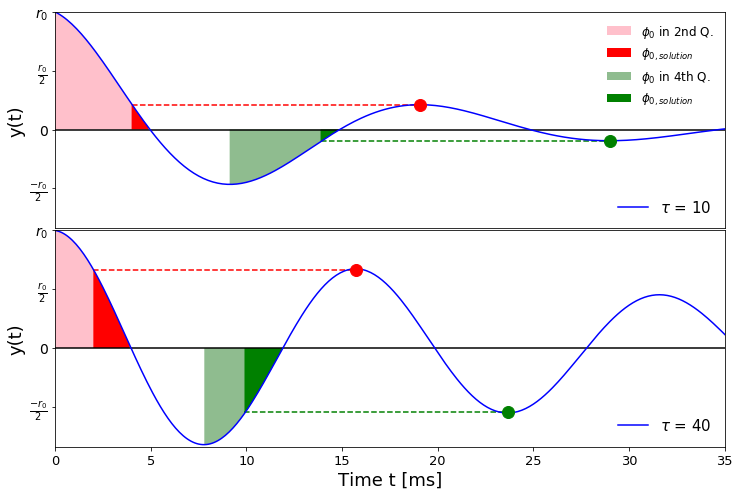

In [4]:



tau1 = .01
tau2 = .04

tcrit0 = (np.arctan(w*tau1)-phi0+1*np.pi) / w
tcrit0l = (np.arctan(w*tau2)-phi0+1*np.pi) / w
tcrit = (np.arctan(w*tau1)-phi0+2*np.pi) / w
tcrit2 = (np.arctan(w*tau1)-phi0+3*np.pi) / w

ycrit0 = r0 * np.exp(-tcrit0 / tau1) * np.sin(phi0 + tcrit0 * w)
ycrit = r0 * np.exp(-tcrit / tau1) * np.sin(phi0 + tcrit * w)
ycrit2 = r0 * np.exp(-tcrit2 / tau1) * np.sin(phi0 + tcrit2 * w)

xcrit = r0 * np.exp(-tcrit / tau1) * np.cos(phi0 + tcrit * w)
xcrit2 = r0 * np.exp(-tcrit2 / tau1) * np.cos(phi0 + tcrit2 * w)


tcritl = (np.arctan(w*tau2)-phi0+2*np.pi) / w
tcrit2l = (np.arctan(w*tau2)-phi0+3*np.pi) / w

ycritl = r0 * np.exp(-tcrit / tau2) * np.sin(phi0 + tcrit * w)
ycrit2l = r0 * np.exp(-tcrit2 / tau2) * np.sin(phi0 + tcrit2 * w)

xcritl = r0 * np.exp(-tcrit / tau2) * np.cos(phi0 + tcrit * w)
xcrit2l = r0 * np.exp(-tcrit2 / tau2) * np.cos(phi0 + tcrit2 * w)

print(tcrit0)

fig = plt.figure(figsize = (12,8))
fig.add_subplot(2,1,1)
plt.axhline(y=0, xmin=0.0, xmax=1.0, color='black')
line1, = plt.plot(ts, y(ts, tau1), color = 'blue', label = r'$\tau$ = 10')
#plt.plot(ts, r(ts, .01), color = 'blue', linestyle = 'dashed')
plt.axis((0, .028, -.84, 1.0))

#plt.plot(ts[0], y(ts, tau1)[0], 'o', color = 'red', markersize = 11.5, label = r'($r_0$, $\phi_0$)')
#plt.axhline(y=y(ts, .01)[0], xmin=0.0, xmax=1.0, color='red')
plt.ylabel('y(t)', fontsize = 18)
plt.yticks([-.5, 0, .5, 1], [r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 14)
#plt.xlabel('time t', fontsize = 18)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)

idx = np.argwhere(np.diff(np.sign((ycrit - y(ts, tau1)))) != 0).reshape(-1) + 0
idx2 = np.argwhere(np.diff(np.sign((ycrit2 - y(ts, tau1)))) != 0).reshape(-1) + 0
zeros = np.argwhere(np.diff(np.sign((0 - y(ts, tau1)))) != 0).reshape(-1) + 0

#print(ts[idx])
#print(ts[idx2])

#print(ts[zeros])
#print(np.where(ts > tcrit0l))
print(ts[73])

plt.plot(tcrit, ycrit, 'o', color = 'red', markersize = 12)
#plt.axhline(y=ycrit, xmin=0.0, xmax=1.0, color='red', linestyle = 'dashed')

plt.plot(tcrit2, ycrit2, 'o', color = 'green', markersize = 12)

plt.hlines(y=ycrit2, xmin=ts[idx2][1], xmax=tcrit2, color='green', linestyle = 'dashed')

plt.hlines(y=ycrit, xmin=ts[idx], xmax=tcrit, color='red', linestyle = 'dashed')
a1 = plt.fill_between(ts[0:zeros[0]+1], y(ts[0:zeros[0]+1], tau1), facecolor = 'pink', interpolate = True, label = r'$\phi_0$ in 2nd Q.')
a2 = plt.fill_between(ts[73:zeros[1]+1], y(ts[73:zeros[1]+1], tau1), facecolor = 'darkseagreen', interpolate = True, label = r'$\phi_0$ in 4th Q.')

a3 = plt.fill_between(ts[idx[0]:zeros[0]+1], 0, y(ts[idx[0]:zeros[0]+1], tau1), facecolor = 'red', interpolate=True, label = r'$\phi_{0,solution}$')
a4 = plt.fill_between(ts[idx2[1]:zeros[1]+1], 0, y(ts[idx2[1]:zeros[1]+1], tau1), facecolor = 'green', interpolate=True, label = r'$\phi_{0,solution}$')
linelegend = plt.legend(handles=[line1], loc='lower right', frameon = False, fontsize = 15)
ax = plt.gca().add_artist(linelegend)

plt.legend(handles = [a1, a3, a2, a4], loc = 'upper right', frameon = False, fontsize = 12)
#plt.plot(t(ts)[idx[1]], y(ts)[idx[1]], 'o')





plt.subplots_adjust(hspace = .01)
fig.add_subplot(2,1,2)
plt.axhline(y=0, xmin=0.0, xmax=1.0, color='black')
line2, = plt.plot(ts, y(ts, tau2), color = 'blue', label = r'$\tau$ = 40')

#plt.plot(ts, r(ts, .01), color = 'blue', linestyle = 'dashed')

plt.axis((0, .035, -.84, 1.0))

#plt.axhline(y=y(ts, .01)[0], xmin=0.0, xmax=1.0, color='red')
plt.ylabel('y(t)', fontsize = 18)
plt.xlabel('Time t [ms]', fontsize = 18)
plt.xticks([0.0, 0.005, .01, .015, .02, .025, .03, .035], ['0', '5', '10', '15', '20', '25', '30', '35'], fontsize = 13)
plt.yticks([-.5, 0, .5, 1], [r'$\frac{-r_0}{2}$', '0', r'$\frac{r_0}{2}$', r'$r_0$'], fontsize = 14)
idxl = np.argwhere(np.diff(np.sign((ycritl - y(ts, tau2)))) != 0).reshape(-1) + 0
idx2l = np.argwhere(np.diff(np.sign((ycrit2l - y(ts, tau2)))) != 0).reshape(-1) + 0
zerosl = np.argwhere(np.diff(np.sign((0 - y(ts, tau2)))) != 0).reshape(-1) + 0
plt.axis((0, .035, -.84, 1.0))
print(ts[zerosl])

#print(ts[idx])

#print(ts[idx2])

plt.plot(tcritl, ycritl, 'o', color = 'red', markersize = 12)
#plt.axhline(y=ycrit, xmin=0.0, xmax=1.0, color='red', linestyle = 'dashed')

plt.plot(tcrit2l, ycrit2l, 'o', color = 'green', markersize = 12)

plt.hlines(y=ycrit2l, xmin=ts[idx2l][1], xmax=tcrit2l, color='green', linestyle = 'dashed')
plt.hlines(y=ycritl, xmin=ts[idxl], xmax=tcritl, color='red', linestyle = 'dashed')

print(idxl)
print(zerosl)
print(ts[idxl[0]:zerosl[0]])
plt.fill_between(ts[0:zerosl[0]+1], y(ts[0:zerosl[0]+1], tau2), facecolor = 'pink', interpolate = True)
plt.fill_between(ts[78:zerosl[1]+1], y(ts[78:zerosl[1]+1], tau2), facecolor = 'darkseagreen', interpolate = True)
plt.fill_between(ts[idxl[0]:zerosl[0]+1], 0, y(ts[idxl[0]:zerosl[0]+1], tau2), facecolor = 'red', interpolate=True)
plt.fill_between(ts[idx2l[1]:zerosl[1]+1], 0, y(ts[idx2l[1]:zerosl[1]+1], tau2), facecolor = 'green', interpolate=True)

plt.legend(handles=[line2], loc='lower right', frameon = False, fontsize = 15)


plt.savefig('BA_Solution24Q2.pdf')

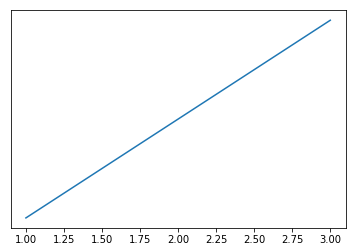

In [8]:
plt.plot([1,2,3], [1,2,3])
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    labelleft=False)
